# Supervised Learning of Actions - Logistic Regression
This note fits a logistic regression model to the sepsis data.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
exportdir='/data/localhost/taufiq/export-dir/'

In [2]:
import logging
logging.basicConfig(filename='logistic-regression.log', level=logging.INFO)

In [3]:
nra = 5
nr_reps = 1

In [4]:
MIMICtable = pd.read_csv(exportdir + '/MIMIC-1hourly-length-5.csv')
MIMICtable = MIMICtable.sort_values(by=['icustay_id', 'bloc'], ignore_index=True)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,mechvent,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance
0,1,3,7.245400e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.663900,599.999991,0.0,0.0,6267.0,0.0,9490.0,4705.0,-3223.0
1,2,3,7.245403e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.672340,339.999995,0.0,0.0,6267.0,10.0,14095.0,4605.0,-7818.0
2,3,3,7.245407e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.649789,339.999995,0.0,0.0,6277.0,20.0,18540.0,4445.0,-12243.0
3,4,3,7.245410e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.634454,339.999995,0.0,0.0,6297.0,20.0,22845.0,4305.0,-16528.0
4,5,3,7.245414e+09,0.0,17639.826435,0.0,0.0,0.0,0.0,1.0,...,0.0,0.645714,497.499993,0.0,0.0,6317.0,20.0,27050.0,4205.0,-20713.0


In [5]:
import os
import glob
os.chdir("/data/localhost/taufiq/pulse-data-5-step")
extension = 'final_.csv'
all_filenames = [i for i in glob.glob('*{}'.format(extension))]
pulse_data = pd.concat([pd.read_csv(f) for f in all_filenames ])
pulse_data = pulse_data.rename(columns={'id': 'icustay_id'})
pulse_data['icustay_id'] = pulse_data['icustay_id'].astype(int)
pulse_data = pulse_data.reset_index(drop=True)
pulse_data = pulse_data.sort_values(by=['icustay_id', 'SimulationTime(s)'], ignore_index=True)
pulse_data['bloc'] = np.arange(len(pulse_data))%5 + 1
pulse_data.head()

,Albumin - BloodConcentration (mg/L),ArterialCarbonDioxidePressure (mmHg),ArterialOxygenPressure (mmHg),ArterialPressure (mmHg),Bicarbonate - BloodConcentration (mg/L),BloodPH (None),BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium - BloodConcentration (mg/L),CarbonDioxideSaturation (None),...,RespirationRate (1/min),SaturationAndFractionOfInspiredOxygenRatio (None),SimulationTime(s),SkinTemperature (degC),Sodium - BloodConcentration (mg/L),SystolicArterialPressure (mmHg),WhiteBloodCellCount (ct/uL),icustay_id,time,bloc
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,20.134228,4.646044,0.0,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,20.833333,4.645351,3600.0,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,20.833333,4.645612,7200.0,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,20.833333,4.645723,10800.0,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,20.833333,4.646063,14400.0,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5


In [6]:
column_mappings = {
    'Albumin - BloodConcentration (mg/L)': 'Albumin',
    'ArterialCarbonDioxidePressure (mmHg)': 'paCO2',
    'ArterialOxygenPressure (mmHg)': 'paO2',
    'Bicarbonate - BloodConcentration (mg/L)': 'HCO3',
    'BloodPH (None)': 'Arterial_pH',
    'Calcium - BloodConcentration (mg/L)': 'Calcium',
    'Chloride - BloodConcentration (mg/L)': 'Chloride',
    'Creatinine - BloodConcentration (mg/L)': 'Creatinine',
    'DiastolicArterialPressure (mmHg)': 'DiaBP',
    'Glucose - BloodConcentration (mg/L)': 'Glucose',
    'Lactate - BloodConcentration (mg/L)': 'Arterial_lactate',
    'MeanArterialPressure (mmHg)': 'MeanBP',
    'Potassium - BloodConcentration (mg/L)': 'Potassium',
    'RespirationRate (1/min)': 'RR',
    'SkinTemperature (degC)': 'Temp_C',
    'Sodium - BloodConcentration (mg/L)': 'Sodium',
    'SystolicArterialPressure (mmHg)': 'SysBP',
    'WhiteBloodCellCount (ct/uL)': 'WBC_count',
    'HeartRate (1/min)': 'HR'
}

pulse_rename = {}

for k, v in column_mappings.items():
    pulse_rename.update({k: f"{v}"})

pulse_data = pulse_data.rename(columns=pulse_rename)

pulse_data = pulse_data.merge(MIMICtable[['gender', 'age', 'Weight_kg', 'icustay_id', 'bloc']], left_on=['icustay_id', 'bloc'], right_on=['icustay_id', 'bloc'])
pulse_data.head()

,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),BloodVolume (mL),Calcium,CarbonDioxideSaturation (None),...,Temp_C,Sodium,SysBP,WBC_count,icustay_id,time,bloc,gender,age,Weight_kg
0,36971.911153,40.121759,90.942581,88.417880,1590.189288,7.412477,13.036798,4640.620191,48.207067,0.028632,...,33.130515,3327.522356,119.898164,7000.0,3,7.245400e+09,1,0.0,17639.826435,66.300000
1,35899.080416,40.295497,92.240242,92.028320,1590.361120,7.410769,15.109420,4769.504190,54.298146,0.028445,...,32.814843,3316.814960,121.301612,7000.0,3,7.245403e+09,2,0.0,17639.826435,78.699997
2,34887.421594,40.313523,92.215037,106.015304,1590.284502,7.410592,20.730085,4897.953845,60.775848,0.028452,...,32.533793,3307.756345,123.275558,7000.0,3,7.245407e+09,3,0.0,17639.826435,78.699997
3,33927.979505,40.325572,92.262822,103.367986,1590.257833,7.410474,25.855462,5026.549368,66.898886,0.028449,...,32.765652,3302.748443,125.600846,7000.0,3,7.245410e+09,4,0.0,17639.826435,78.699997
4,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,5144.112833,72.855658,0.028455,...,32.834440,3277.230920,126.459716,7000.0,3,7.245414e+09,5,0.0,17639.826435,78.699997


In [7]:
#################   Convert training data and compute conversion factors    ######################
logging.info('Processing raw data')
# all 47 columns of interest
colbin = ['gender']
colnorm = ['age','Weight_kg','HR','SysBP','MeanBP','DiaBP','RR','Temp_C',\
    'Potassium','Sodium','Chloride','Glucose','Calcium',\
    'WBC_count','Arterial_pH','HCO3','Arterial_lactate', 'paO2','paCO2', 'Albumin']
collog=['Creatinine']

MIMICraw = MIMICtable[colbin+colnorm].copy()
pulseraw = pulse_data[colbin+colnorm].copy()

for col in MIMICraw:
    if col in colbin:
        MIMICraw[col] = MIMICraw[col] - 0.5
        pulseraw[col] = pulseraw[col] - 0.5
    elif col in colnorm:
        cmu = MIMICraw[col].mean()
        csigma = MIMICraw[col].std()
        MIMICraw[col] = (MIMICraw[col] - cmu)/csigma
        pulseraw[col] = (pulseraw[col] - cmu)/csigma
    else:
        log_values = np.log(0.1 + MIMICraw[col])
        dmu = log_values.mean()
        dsigma = log_values.std()
        MIMICraw[col] = (log_values - dmu)/dsigma 
        pulseraw[col] = (np.log(0.1 + pulseraw[col]) - dmu)/dsigma 
logging.info('Raw data processed')

## Include the information for doses taken until time $t$

In [8]:
logging.info('Adding input values to X')

# MIMICraw['last_input'] = 0.0
# MIMICraw['total_input_before'] = 0.0
# MIMICraw['last_vaso_dose'] = 0.0

# for index, row in MIMICtable.iterrows():
#     if index < len(MIMICtable) - 1 and (MIMICtable.at[index+1,'icustay_id'] == MIMICtable.at[index,'icustay_id']):
#         MIMICraw.at[index+1, 'last_input'] = MIMICtable.at[index, 'input_1hourly']
#         MIMICraw.at[index+1, 'total_input_before'] = MIMICtable.at[index, 'input_total']
#         MIMICraw.at[index+1, 'last_vaso_dose'] = MIMICtable.at[index, 'max_dose_vaso']

def log_normalise(colname):
    global MIMICraw
    log_values = np.log(0.1 + MIMICraw[colname])
    dmu = log_values.mean()
    dsigma = log_values.std()
    MIMICraw[colname] = (log_values - dmu)/dsigma

# log_normalise('last_input')
# log_normalise('total_input_before')
# MIMICraw['last_vaso_dose'] = MIMICraw['last_vaso_dose'] - 0.5

logging.info('Input values added to X')

In [9]:
pulseraw.head()

,gender,age,Weight_kg,HR,SysBP,MeanBP,DiaBP,RR,Temp_C,Potassium,...,Chloride,Glucose,Calcium,WBC_count,Arterial_pH,HCO3,Arterial_lactate,paO2,paCO2,Albumin
0,-0.5,-1.045426,-0.635677,-0.201878,-0.074952,1.022051,0.547376,0.017945,-1.944897,-0.216509,...,-0.170839,-0.734866,-3.621278,-0.576816,0.369124,0.358605,-0.399198,-0.707879,-0.238535,0.596819
1,-0.5,-1.045426,-0.128726,-0.326644,-0.010774,1.036072,0.473408,0.144600,-2.110068,-0.401211,...,-0.866243,0.199222,-3.015047,-0.576816,0.350553,0.359138,-0.501247,-0.698052,-0.224661,0.449559
2,-0.5,-1.045426,-0.128726,-0.556979,0.079493,1.047040,0.346435,0.144600,-2.257124,-0.561786,...,-1.262772,0.210317,-2.370337,-0.576816,0.348631,0.358900,-0.589427,-0.698243,-0.223221,0.310695
3,-0.5,-1.045426,-0.128726,-0.764843,0.185826,1.068508,0.226273,0.144600,-2.135807,-0.714633,...,-1.636899,0.221509,-1.760925,-0.576816,0.347346,0.358818,-0.665101,-0.697881,-0.222259,0.178999
4,-0.5,-1.045426,-0.128726,-0.953370,0.225101,1.021378,0.078545,0.144600,-2.099814,-0.847611,...,-1.961100,0.231787,-1.168061,-0.576816,0.349533,0.357935,-0.728226,-0.697389,-0.223897,0.063775


## Create Actions


In [10]:
from sklearn.cluster import KMeans
from scipy.stats import rankdata

logging.info('Creating action bins')
nact = nra**2
input_1hourly_nonzero = MIMICtable.loc[MIMICtable['input_1hourly']>0, 'input_1hourly']
iol_ranked = rankdata(input_1hourly_nonzero)/len(input_1hourly_nonzero) # excludes zero fluid (will be action 1)
iof = np.floor((iol_ranked + 0.2499999999)*4) # converts iv volume in 4 actions
io = np.ones(len(MIMICtable)) # array of ones, by default
io[MIMICtable['input_1hourly']>0] = iof + 1 # where more than zero fluid given: save actual action
vc = MIMICtable['max_dose_vaso'].copy()
vc_nonzero = MIMICtable.loc[MIMICtable['max_dose_vaso']!=0, 'max_dose_vaso']
vc_ranked = rankdata(vc_nonzero)/len(vc_nonzero)
vcf = np.floor((vc_ranked + 0.2499999999)*4) # converts to 4 bins
vcf[vcf==0] = 1
vc[vc!=0] = vcf + 1
vc[vc==0] = 1
# median dose of drug in all bins
ma1 = [MIMICtable.loc[io==1, 'input_1hourly'].median(), MIMICtable.loc[io==2, 'input_1hourly'].median(), MIMICtable.loc[io==3, 'input_1hourly'].median(), MIMICtable.loc[io==4, 'input_1hourly'].median(), MIMICtable.loc[io==5, 'input_1hourly'].median()]
ma2 = [MIMICtable.loc[vc==1, 'max_dose_vaso'].median(), MIMICtable.loc[vc==2, 'max_dose_vaso'].median(), MIMICtable.loc[vc==3, 'max_dose_vaso'].median(), MIMICtable.loc[vc==4, 'max_dose_vaso'].median(), MIMICtable.loc[vc==5, 'max_dose_vaso'].median()]
med = pd.DataFrame(data={'IV':io, 'VC': vc})
med = med.astype({'IV': 'int32', 'VC': 'int32'})
uniqueValues = med.drop_duplicates().reset_index(drop=True)
uniqueValueDoses = pd.DataFrame()
for index, row in uniqueValues.iterrows():
    uniqueValueDoses.at[index, 'IV'], uniqueValueDoses.at[index, 'VC'] = ma1[row['IV']-1], ma2[row['VC']-1]

actionbloc = pd.DataFrame()
for index, row in med.iterrows():
    actionbloc.at[index, 'action_bloc'] = uniqueValues.loc[(uniqueValues['IV'] == row['IV']) & (uniqueValues['VC'] == row['VC'])].index.values[0]+1
actionbloc = actionbloc.astype({'action_bloc':'int32'})

logging.info('Action bins created')

In [109]:
uniqueValues.head(6)

,IV,VC
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,2,3


In [111]:
ma1

[0.0, 10.0, 23.0165, 97.19701666666666, 310.0]

In [112]:
ma2

[0.0, 0.04, 0.1, 0.225, 0.562]

In [12]:
from sklearn.cluster import KMeans

prop = 0.25
X = MIMICraw
sample = X[np.floor(np.random.rand(len(X))+prop) == 1]

wcss = []
for i in tqdm(range(301,600,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sample)
    wcss.append(kmeans.inertia_)    

100%|██████████| 30/30 [06:20<00:00, 12.69s/it]


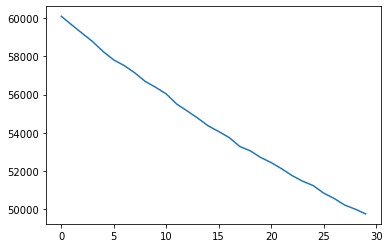

In [13]:
import matplotlib.pyplot as plt
plt.plot(wcss)

In [14]:
from sklearn.cluster import KMeans
from scipy.stats import rankdata

prop=0.25
X = MIMICraw
sample = X[np.floor(np.random.rand(len(X))+prop) == 1]
kmeans = KMeans(n_clusters=10, random_state=0).fit(sample)
idx = kmeans.predict(X)

In [15]:
len(pulse_data)

24715

In [16]:
trajectories = pd.DataFrame()
trajectories['t'] = np.arange(len(idx))%5
trajectories['S_t'] = idx
trajectories['icustay_id'] = MIMICtable['icustay_id']
trajectories['A_t'] = actionbloc['action_bloc']
trajectories = trajectories[trajectories['t']!=4]

In [17]:
trajectories.head()

,t,S_t,icustay_id,A_t
0,0,0,3,1
1,1,0,3,2
2,2,0,3,3
3,3,0,3,3
5,0,3,14,4


In [18]:
pulse_trajecs = pd.DataFrame()
pulse_idx = kmeans.predict(pulseraw)
pulse_trajecs['t'] = np.arange(len(pulse_idx))%5
pulse_trajecs['S_t'] = pulse_idx
pulse_trajecs['icustay_id'] = pulse_data['icustay_id']
pulse_trajecs = pulse_trajecs[pulse_trajecs['t']!=4]
pulse_trajecs = pulse_trajecs.merge(trajectories[['t','icustay_id', 'A_t']], left_on=['icustay_id', 't'], right_on=['icustay_id', 't'])
pulse_trajecs.head()

,t,S_t,icustay_id,A_t
0,0,3,3,1
1,1,2,3,2
2,2,2,3,3
3,3,2,3,3
4,0,3,14,4


In [19]:
trajec_actions = pd.DataFrame()
for index, row in trajectories.iterrows():
    if row['t'] == 0 and index > 0:
        trajec_actions = trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)
        traj = [row['S_t']]
        actions = [row['A_t']]
    elif index == 0:
        traj = [row['S_t']]
        actions = [row['A_t']]
    else:
        traj.append(row['S_t'])
        actions.append(row['A_t'])

trajec_actions = trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)

In [20]:
pulse_trajec_actions = pd.DataFrame()
for index, row in pulse_trajecs.iterrows():
    if row['t'] == 0 and index > 0:
        pulse_trajec_actions = pulse_trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)
        traj = [row['S_t']]
        actions = [row['A_t']]
    elif index == 0:
        traj = [row['S_t']]
        actions = [row['A_t']]
    else:
        traj.append(row['S_t'])
        actions.append(row['A_t'])

pulse_trajec_actions = pulse_trajec_actions.append({'trajectory': traj, 'actions': actions}, ignore_index=True)

In [21]:
pulse_trajec_actions['icustay_id'] = pulse_trajecs['icustay_id'].unique()
pulse_trajec_actions.head()

,actions,trajectory,icustay_id
0,"[1, 2, 3, 3]","[3, 2, 2, 2]",3
1,"[4, 5, 4, 3]","[3, 7, 7, 7]",14
2,"[6, 7, 7, 8]","[3, 3, 7, 7]",75
3,"[1, 1, 1, 1]","[2, 2, 2, 2]",85
4,"[3, 3, 3, 3]","[3, 3, 7, 7]",87


In [22]:
def find_elements(series, element):
    return series.apply(lambda x: x == element)

def find_elements_starting_with(series, element):
    return series.apply(lambda x: x[:len(element)] == element)

In [23]:
for index, row in trajec_actions.iterrows():
    prob_a_den = 0
    gamma = []
    for i in range(len(row['actions'])):
        prob_a_num = (find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]) & find_elements_starting_with(trajec_actions['actions'],row['actions'][:i+1])).sum()
        if i == 0:
            prob_a_den += find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]).sum()
        else:
            prob_a_den += ((find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i+1]))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum() -\
            ((find_elements_starting_with(trajec_actions['trajectory'],row['trajectory'][:i]))&(find_elements_starting_with(trajec_actions['actions'],row['actions'][:i]))).sum()
        gamma.append(prob_a_num/prob_a_den)
        trajec_actions.at[index, f'prob_a_{i}'] = prob_a_num/prob_a_den
    trajec_actions.at[index, 'prob_a'] = prob_a_num/prob_a_den

In [24]:
icustayids = MIMICtable['icustay_id'].unique()
trajec_actions['icustay_id'] = icustayids

In [25]:
trajec_actions.head()

,actions,trajectory,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,icustay_id
0,"[1, 2, 3, 3]","[0, 0, 0, 0]",0.490411,0.019928,0.005455,0.003643,0.003643,3
1,"[4, 5, 4, 3]","[3, 3, 3, 3]",0.085960,0.007485,0.001499,0.001499,0.001499,14
2,"[6, 7, 7, 8]","[7, 7, 3, 3]",0.007292,0.001044,0.001044,0.001044,0.001044,75
3,"[1, 1, 1, 1]","[2, 2, 2, 2]",0.537500,0.299779,0.191882,0.118954,0.118954,85
4,"[3, 3, 3, 3]","[3, 3, 3, 3]",0.113181,0.042553,0.023112,0.012403,0.012403,87


In [26]:
mimic_data_last_time = MIMICtable[MIMICtable['bloc'] == 5]
trajec_actions = trajec_actions.merge(mimic_data_last_time, left_on='icustay_id', right_on='icustay_id')

In [27]:
trajec_actions.head()

,actions,trajectory,prob_a_0,prob_a_1,prob_a_2,prob_a_3,prob_a,icustay_id,bloc,charttime,...,mechvent,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance
0,"[1, 2, 3, 3]","[0, 0, 0, 0]",0.490411,0.019928,0.005455,0.003643,0.003643,3,5,7.245414e+09,...,0.0,0.645714,497.499993,0.000,0.00,6317.000000,20.000000,27050.0,4205.0,-20713.000000
1,"[4, 5, 4, 3]","[3, 3, 3, 3]",0.085960,0.007485,0.001499,0.001499,0.001499,14,5,4.264284e+09,...,0.0,0.554667,447.499993,0.000,0.00,1300.000000,80.000000,3399.0,464.0,-2019.000000
2,"[6, 7, 7, 8]","[7, 7, 3, 3]",0.007292,0.001044,0.001044,0.001044,0.001044,75,5,5.987192e+09,...,0.0,0.668168,254.482759,0.255,0.27,157.317800,76.038433,30960.0,5055.0,-30726.643767
3,"[1, 1, 1, 1]","[2, 2, 2, 2]",0.537500,0.299779,0.191882,0.118954,0.118954,85,5,4.175249e+09,...,0.0,0.603550,500.000000,0.000,0.00,0.000000,0.000000,39438.0,6573.0,-39438.000000
4,"[3, 3, 3, 3]","[3, 3, 3, 3]",0.113181,0.042553,0.023112,0.012403,0.012403,87,5,7.153045e+09,...,0.0,0.668889,330.000000,0.000,0.00,5817.717667,25.479000,20060.0,3225.0,-14216.803333


In [28]:
pulse_data_last_time = pulse_data[pulse_data['bloc'] == 5]
pulse_trajec_actions = pulse_trajec_actions.merge(pulse_data_last_time, left_on='icustay_id', right_on='icustay_id')

In [29]:
pulse_trajec_actions.head()

,actions,trajectory,icustay_id,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),...,SimulationTime(s),Temp_C,Sodium,SysBP,WBC_count,time,bloc,gender,age,Weight_kg
0,"[1, 2, 3, 3]","[3, 2, 2, 2]",3,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,...,14400.0,32.834440,3277.230920,126.459716,7000.0,7.245414e+09,5,0.0,17639.826435,78.699997
1,"[4, 5, 4, 3]","[3, 7, 7, 7]",14,27762.117998,39.349305,93.040334,124.141909,1588.063797,7.420161,27.589372,...,14400.0,32.982227,3281.155130,134.524102,7000.0,4.264284e+09,5,0.0,30946.970000,71.800000
2,"[6, 7, 7, 8]","[3, 3, 7, 7]",75,31398.788149,39.560312,92.632462,73.499676,1589.163209,7.418047,39.250359,...,14400.0,33.843513,3272.871578,106.843624,7000.0,5.987192e+09,5,1.0,30550.009259,58.100000
3,"[1, 1, 1, 1]","[2, 2, 2, 2]",85,34178.434836,39.565089,92.889440,98.439060,1588.193863,7.417999,13.995146,...,14400.0,33.396193,3278.113703,121.901447,7000.0,4.175249e+09,5,0.0,20450.681678,61.000000
4,"[3, 3, 3, 3]","[3, 3, 7, 7]",87,32291.338009,40.199505,93.184559,57.127454,1589.718675,7.411712,34.716810,...,14400.0,33.008978,3277.371551,115.885281,7000.0,7.153045e+09,5,0.0,23495.472095,67.000000


In [30]:
def bounds(col, trajec, actions):
    global trajec_actions
    exp_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], actions), col].mean()
    prob_a = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], actions), 'prob_a'].values[0]
    max_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec), col].max()
    min_y = trajec_actions.loc[find_elements(trajec_actions['trajectory'], trajec), col].min()
    return prob_a*exp_y + (1-prob_a)*min_y, prob_a*exp_y + (1-prob_a)*max_y
    

In [31]:
def exp_potential_outcome(col, trajec, actions):
    global pulse_trajec_actions
    exp_y = pulse_trajec_actions.loc[find_elements(pulse_trajec_actions['trajectory'], trajec) & find_elements(pulse_trajec_actions['actions'], actions), col].mean()
    return exp_y

In [32]:
def in_bound(col):
    global trajec_actions, pulse_trajec_actions
    inbounds = []
    for index, row in trajec_actions.iterrows():
        lb, ub = bounds(col, row['trajectory'], row['actions'])
        exp_y = exp_potential_outcome(col, row['trajectory'], row['actions'])
        if exp_y == float('NaN'):
            inbounds.append(1)
        else:
            in_bound = int((exp_y >= lb) and (exp_y <= ub))
            inbounds.append(in_bound)
    return inbounds            
        

In [33]:
inbounds = in_bound('SysBP')

In [34]:
np.sum(inbounds)/len(inbounds)

0.12368463655496195

In [35]:
inbounds = in_bound('DiaBP')
np.sum(inbounds)/len(inbounds)

0.12206572769953052

In [36]:
from scipy import stats
import numpy as np
import math

def find_t_statistic(col, trajec, action):
    global trajec_actions, pulse_trajec_actions
    sim_filtered = pulse_trajec_actions[find_elements(pulse_trajec_actions['trajectory'], trajec) & find_elements(pulse_trajec_actions['actions'], action)].copy()
    n_sim = len(sim_filtered)
    real_filtered = trajec_actions[find_elements(trajec_actions['trajectory'], trajec) & find_elements(trajec_actions['actions'], action)].copy()
    n_real = len(real_filtered)
    exp_y = real_filtered[col].mean()
    prob = real_filtered['prob_a'].max()
    max_y = real_filtered[col].max()
    min_y = real_filtered[col].min()
    sigma_real = prob**2*real_filtered[col].var()
    
    if n_sim == 0:
        return -1, -1, -1, -1
    exp_ysim = sim_filtered[col].mean()
    sigma_sim = sim_filtered[col].var()
    ub = prob*exp_y + (1-prob)*max_y
    lb = prob*exp_y + (1-prob)*min_y
    
    mu_ub = -(prob*exp_y + (1-prob)*max_y - exp_ysim)
    t_ub = mu_ub/np.sqrt(sigma_real/n_real + sigma_sim/n_sim)
    df = n_real + n_sim - 2
    p_ub = 1 - stats.t.cdf(t_ub, df=df)
    
    mu_lb = (prob*exp_y + (1-prob)*min_y - exp_ysim)
    t_lb = mu_lb/np.sqrt(sigma_real/n_real + sigma_sim/n_sim)
    p_lb = 1 - stats.t.cdf(t_lb, df=df)    
    
    if math.isnan(p_ub) or math.isnan(p_ub):
        return -1, -1, -1, -1
    return p_lb, t_lb, p_ub, t_ub
    

In [37]:
p_values = pd.DataFrame()
for index, row in trajec_actions.iterrows():
    p_lb, t_lb, p_ub, t_ub = find_t_statistic('RR', row['trajectory'], row['actions'])
    if p_lb != -1 and p_ub != -1:
        p_values = p_values.append({'trajec': row['trajectory'], 'actions': row['actions'], 'p_lb': p_lb, 'p_ub': p_ub, 't_lb': t_lb, 't_ub': t_ub}, ignore_index=True)

In [38]:
p_values.head()

,actions,p_lb,p_ub,t_lb,t_ub,trajec
0,"[1, 2, 3, 3]",0.947756,1.000000,-2.305210,-359.909107,"[0, 0, 0, 0]"
1,"[1, 1, 1, 1]",1.000000,1.000000,-51.886007,-123.939106,"[2, 2, 2, 2]"
2,"[3, 3, 3, 3]",1.000000,1.000000,-8.093908,-72.498589,"[2, 2, 2, 2]"
3,"[2, 2, 2, 2]",0.999917,1.000000,-7.272039,-24.779424,"[8, 8, 8, 8]"
4,"[1, 4, 5, 5]",0.978470,0.093544,-2.401750,1.442705,"[2, 2, 2, 2]"


In [39]:
p_values[(p_values['p_lb']<0.05) ^ (p_values['p_ub']<0.05)]

,actions,p_lb,p_ub,t_lb,t_ub,trajec
23,"[1, 1, 1, 1]",2.157202e-03,0.999752,5.829397,-10.330168,"[0, 0, 2, 2]"
25,"[5, 3, 3, 3]",9.887772e-01,0.017576,-4.349455,3.663753,"[2, 2, 2, 2]"
41,"[2, 2, 5, 5]",9.606558e-01,0.045134,-3.350946,3.098664,"[2, 2, 2, 2]"
54,"[5, 3, 3, 3]",9.887772e-01,0.017576,-4.349455,3.663753,"[2, 2, 2, 2]"
62,"[5, 5, 4, 4]",2.199934e-02,0.999500,2.902701,-8.610209,"[2, 2, 2, 2]"
70,"[1, 1, 5, 1]",1.985928e-06,1.000000,35.010622,-98.723745,"[0, 0, 0, 0]"
96,"[2, 3, 3, 3]",2.361212e-03,0.999960,3.726570,-6.794699,"[2, 2, 2, 2]"
108,"[1, 1, 1, 1]",1.315011e-02,0.998981,6.043935,-22.112940,"[8, 8, 8, 7]"
110,"[1, 1, 1, 5]",1.836708e-09,1.000000,13.851375,-94.262002,"[0, 0, 0, 0]"
117,"[2, 2, 5, 5]",9.606558e-01,0.045134,-3.350946,3.098664,"[2, 2, 2, 2]"


In [40]:
(p_values[['p_lb', 'p_ub']] < 0.05/478).sum()

p_lb    11
p_ub     0
dtype: int64

In [41]:
pulse_trajec_actions.head()

,actions,trajectory,icustay_id,Albumin,paCO2,paO2,ArterialPressure (mmHg),HCO3,Arterial_pH,BloodUreaNitrogenConcentration (mg/dL),...,SimulationTime(s),Temp_C,Sodium,SysBP,WBC_count,time,bloc,gender,age,Weight_kg
0,"[1, 2, 3, 3]","[3, 2, 2, 2]",3,33088.536551,40.305062,92.327881,71.410965,1589.972682,7.410675,30.823689,...,14400.0,32.834440,3277.230920,126.459716,7000.0,7.245414e+09,5,0.0,17639.826435,78.699997
1,"[4, 5, 4, 3]","[3, 7, 7, 7]",14,27762.117998,39.349305,93.040334,124.141909,1588.063797,7.420161,27.589372,...,14400.0,32.982227,3281.155130,134.524102,7000.0,4.264284e+09,5,0.0,30946.970000,71.800000
2,"[6, 7, 7, 8]","[3, 3, 7, 7]",75,31398.788149,39.560312,92.632462,73.499676,1589.163209,7.418047,39.250359,...,14400.0,33.843513,3272.871578,106.843624,7000.0,5.987192e+09,5,1.0,30550.009259,58.100000
3,"[1, 1, 1, 1]","[2, 2, 2, 2]",85,34178.434836,39.565089,92.889440,98.439060,1588.193863,7.417999,13.995146,...,14400.0,33.396193,3278.113703,121.901447,7000.0,4.175249e+09,5,0.0,20450.681678,61.000000
4,"[3, 3, 3, 3]","[3, 3, 7, 7]",87,32291.338009,40.199505,93.184559,57.127454,1589.718675,7.411712,34.716810,...,14400.0,33.008978,3277.371551,115.885281,7000.0,7.153045e+09,5,0.0,23495.472095,67.000000


In [42]:
import matplotlib.pyplot as plt

column_names_unit = {
    'Albumin': 'Albumin Blood Concentration (mg/L)',
    'paCO2': 'Arterial $CO_2$ Pressure (mmHg)',
    'paO2': 'Arterial $O_2$ Pressure (mmHg)',
    'HCO3': 'Bicarbonate Blood Concentration (mg/L)',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration (mg/L)',
    'Calcium': 'Calcium Blood Concentration (mg/L)',
    'Chloride': 'Chloride Blood Concentration (mg/L)',
    'Creatinine': 'Creatinine Blood Concentration (mg/L)',
    'DiaBP': 'Diastolic Arterial Pressure (mmHg)',
    'SysBP': 'Systolic Arterial Pressure (mmHg)',
    'Glucose': 'Glucose Blood Concentration (mg/L)',
    'Lactate': 'Lactate Blood Concentration (mg/L)',
    'MeanBP': 'Mean Arterial Pressure (mmHg)',
    'Potassium': 'Potassium Blood Concentration (mg/L)',
    'RR': 'Respiration Rate (1/min)',
    'Temp_C': 'Skin Temperature (C)',
    'Sodium': 'Sodium Blood Concentration (mg/L)',
    'WBC_count': 'White Blood Cell Count (ct/uL)',
    'HR': 'Heart Rate (1/min)'
}

def plot_bounds(col, trajec, action):
    global trajec_actions, pulse_trajec_actions, column_names_unit
    lb = []
    ub = []
    sim_mean, sim_lb, sim_ub = [], [], []
    max_vals, min_vals = [], []
    probs = []
    for i in range(len(actions)):
        sim_filtered = pulse_trajec_actions[['actions', 'trajectory', 'icustay_id']].merge(pulse_data[pulse_data['bloc'] == i+2])
        sim_filtered = sim_filtered[find_elements_starting_with(pulse_trajec_actions['trajectory'], trajec[:i+1]) & find_elements_starting_with(pulse_trajec_actions['actions'], action[:i+1])].copy()
        n_sim = len(sim_filtered)
        real_filtered = trajec_actions[['actions', 'trajectory', 'icustay_id', f'prob_a_{i}']].merge(MIMICtable[MIMICtable['bloc'] == i+2])
        real_filtered = real_filtered[find_elements_starting_with(trajec_actions['trajectory'], trajec[:i+1]) & find_elements_starting_with(trajec_actions['actions'], action[:i+1])].copy()
        lb.append(real_filtered[col].mean() * real_filtered[f'prob_a_{i}'].mean() + (1-real_filtered[f'prob_a_{i}'].mean())*real_filtered[col].max())
        ub.append(real_filtered[col].mean() * real_filtered[f'prob_a_{i}'].mean() + (1-real_filtered[f'prob_a_{i}'].mean())*real_filtered[col].min())
        max_vals.append(real_filtered[col].max())
        min_vals.append(real_filtered[col].min())
        sim_mean.append(sim_filtered[col].mean())
        sim_lb.append(sim_filtered[col].mean() - np.sqrt(sim_filtered[col].var()))
        sim_ub.append(sim_filtered[col].mean() + np.sqrt(sim_filtered[col].var()))
        probs.append(real_filtered[f'prob_a_{i}'].mean())
    plt.figure(figsize=(12,8))
    plt.plot(range(1,5), sim_mean, '-', color='gray')
    plt.xlabel('Time (hr)', fontsize=13)
    plt.ylabel(column_names_unit[col], fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.fill_between(range(1,5), sim_ub, sim_lb, color='navy', alpha=0.4, label='Simulated')
    plt.fill_between(range(1,5), lb, ub, color='blue', alpha=0.2, label='Bareinboim bounds')
    plt.fill_between(range(1,5), min_vals, max_vals, color='pink', alpha=0.5, label='Max-min bounds')
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.show()
    return probs, len(real_filtered)

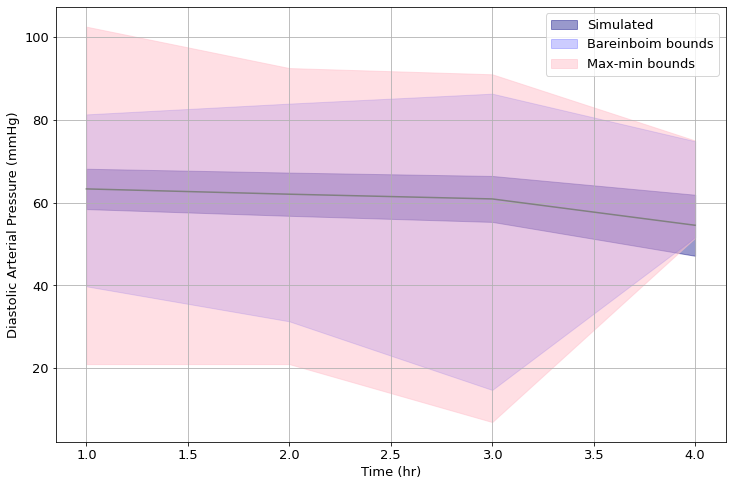

([0.4904109589041076,
  0.2644927536231878,
  0.14799999999999983,
  0.012552301255230125],
 6)

In [43]:
plot_bounds('DiaBP', [0, 0, 0, 0], [1, 1, 1, 5])

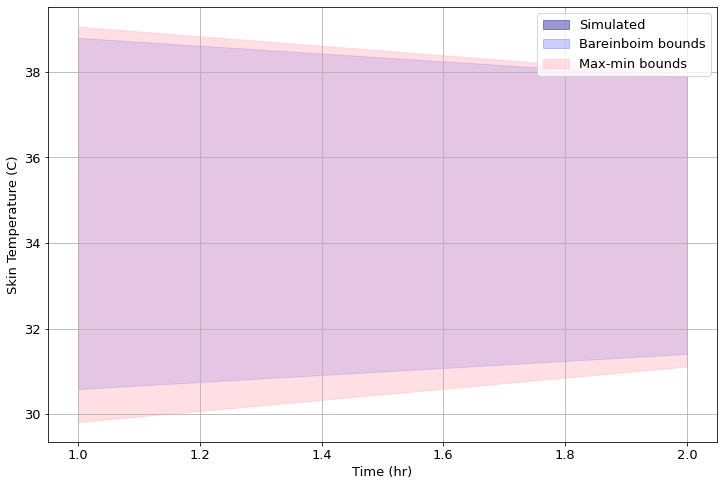

([0.11145833333333324, 0.05245901639344259, nan, nan], 0)

In [44]:
plot_bounds('Temp_C', [7, 7, 9, 9], [2, 2, 2, 2])

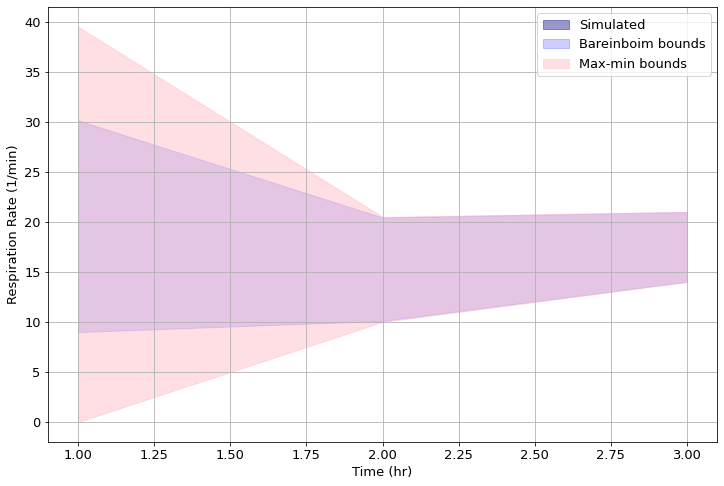

([0.46458333333333546, 0.015296367112810709, 0.003861003861003861, nan], 0)

In [45]:
plot_bounds('RR', [7, 8, 8, 8], [1, 1, 1, 1])

In [46]:
trajec_actions[['trajectory', 'actions', 'prob_a']].groupby(['prob_a']).max()

,trajectory,actions
prob_a,,
0.000833,"[2, 9, 5, 2]","[25, 25, 3, 3]"
0.000834,"[2, 9, 9, 9]","[24, 24, 24, 24]"
0.000835,"[2, 2, 2, 7]","[16, 16, 23, 23]"
0.000835,"[2, 7, 2, 2]","[16, 19, 8, 19]"
0.000858,"[6, 6, 6, 4]","[16, 16, 16, 16]"
...,...,...
0.118954,"[2, 2, 2, 2]","[1, 1, 1, 1]"
0.139785,"[1, 1, 1, 1]","[1, 1, 1, 1]"
0.157895,"[4, 4, 4, 4]","[1, 1, 1, 1]"


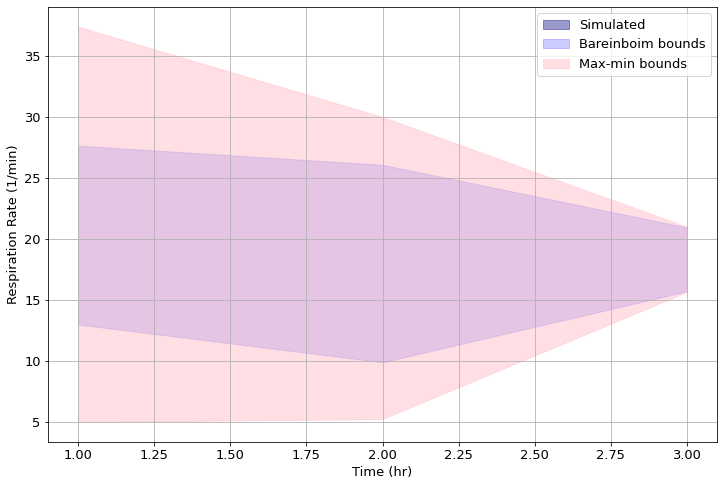

([0.5476190476190499, 0.3461538461538465, 0.016877637130801686, nan], 0)

In [47]:
plot_bounds('RR', [4, 4, 4, 4], [1, 1, 2, 2])

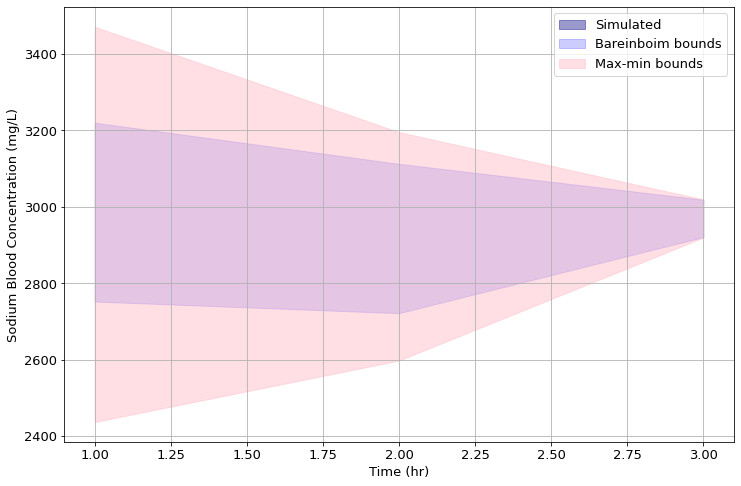

([0.5476190476190499, 0.3461538461538465, 0.016877637130801686, nan], 0)

In [48]:
plot_bounds('Sodium', [4, 4, 4, 4], [1, 1, 2, 2])

In [49]:
def rejected_hypotheses(col):
    state_actions = trajec_actions[['trajectory', 'actions']].copy()
    state_actions.loc[:,'s'] = state_actions['trajectory'].apply(tuple)
    state_actions.loc[:,'a'] = state_actions['actions'].apply(tuple)
    state_actions = state_actions.drop_duplicates(['s', 'a'])
    total_hypotheses = len(state_actions)
    p_values = pd.DataFrame()
    for index, row in state_actions.iterrows():
        p_lb, t_lb, p_ub, t_ub = find_t_statistic(col, row['trajectory'], row['actions'])
        if p_lb != -1 and p_ub != -1:
            p_values = p_values.append({'trajec': row['trajectory'], 'actions': row['actions'], 'p_lb': p_lb, 'p_ub': p_ub, 't_lb': t_lb, 't_ub': t_ub}, ignore_index=True)
    rej_hyps = p_values[(p_values['p_lb']<0.05/total_hypotheses) ^ (p_values['p_ub']<0.05/total_hypotheses)]
    return len(rej_hyps), p_values, rej_hyps


In [50]:
rejected_hyp = pd.DataFrame()
for key, value in column_mappings.items():
    rej_hyps, _, _ = rejected_hypotheses(value)
    rejected_hyp = rejected_hyp.append({'Outcome $Y$': value, '# rejected hypotheses': rej_hyps}, ignore_index=True)

In [51]:
rejected_hyp

,# rejected hypotheses,Outcome $Y$
0,3.0,Albumin
1,9.0,paCO2
2,13.0,paO2
3,20.0,HCO3
4,9.0,Arterial_pH
5,33.0,Calcium
6,41.0,Chloride
7,16.0,Creatinine
8,6.0,DiaBP
9,12.0,Glucose


In [100]:
column_names = {
    'Albumin': 'Albumin Blood Concentration',
    'paCO2': 'Arterial $CO_2$ Pressure',
    'paO2': 'Arterial $O_2$ Pressure',
    'HCO3': 'Bicarbonate Blood Concentration',
    'Arterial_pH': 'Arterial pH',
    'Arterial_lactate': 'Lactate Blood Concentration',
    'Calcium': 'Calcium Blood Concentration',
    'Chloride': 'Chloride Blood Concentration',
    'Creatinine': 'Creatinine Blood Concentration',
    'DiaBP': 'Diastolic Arterial Pressure',
    'SysBP': 'Systolic Arterial Pressure',
    'Glucose': 'Glucose Blood Concentration',
    'Lactate': 'Lactate Blood Concentration',
    'MeanBP': 'Mean Arterial Pressure',
    'Potassium': 'Potassium Blood Concentration',
    'RR': 'Respiration Rate',
    'Temp_C': 'Body Temperature',
    'Skin Temperature': 'Body Temperature',
    'Sodium': 'Sodium Blood Concentration',
    'WBC_count': 'White Blood Cell Count',
    'HR': 'Heart Rate'
}

In [101]:
for index, row in rejected_hyp.iterrows():
    if row['Outcome $Y$'] in column_names:
        rejected_hyp.at[index, 'Outcome $Y$'] = column_names[row['Outcome $Y$']]

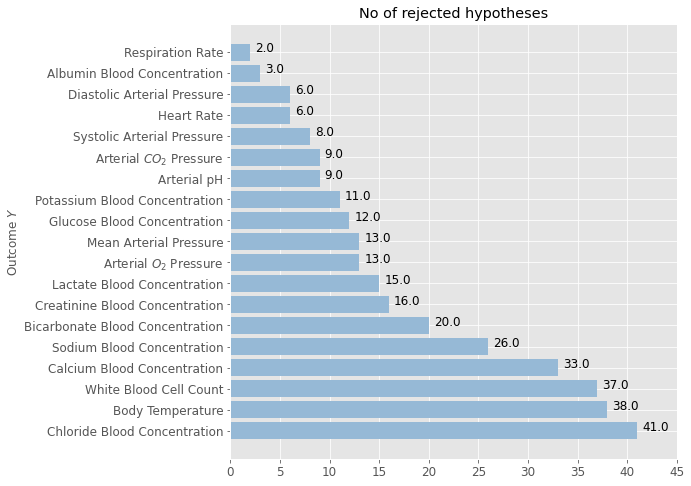

In [102]:
from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
# figure(num=None, figsize=(8, 8), dpi=80)
fig, ax = plt.subplots(figsize=(8,8))

rejected_hyp.sort_values('# rejected hypotheses', ascending=False, inplace=True)
ax.barh(rejected_hyp['Outcome $Y$'],rejected_hyp['# rejected hypotheses'],  color='#96b9d6')
y = rejected_hyp['# rejected hypotheses']
for i, v in enumerate(y):
    ax.text(v + 0.5, i, str(v), fontsize=12)

plt.title('No of rejected hypotheses')
plt.ylabel('Outcome $Y$')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
plt.style.use('ggplot')
plt.xlim([0,45])
# plt.xlabel()
plt.show()
# rejected_hyp.plot(kind='barh')

In [103]:
_, p_values, rej_hyps = rejected_hypotheses('Temp_C')

In [104]:
rej_hyps

,actions,p_lb,p_ub,t_lb,t_ub,trajec
1,"[1, 1, 1, 1]",0.000000e+00,1.000000,39.756293,-82.835973,"[2, 2, 2, 2]"
2,"[3, 3, 3, 3]",0.000000e+00,1.000000,19.796178,-37.526319,"[2, 2, 2, 2]"
7,"[4, 4, 4, 4]",0.000000e+00,1.000000,25.933874,-42.071897,"[0, 0, 0, 0]"
8,"[2, 2, 2, 2]",9.714562e-12,1.000000,9.801799,-27.430325,"[0, 0, 0, 0]"
9,"[5, 5, 5, 5]",0.000000e+00,1.000000,13.794480,-21.791580,"[2, 2, 2, 2]"
10,"[3, 3, 3, 3]",0.000000e+00,1.000000,19.180068,-46.590880,"[0, 0, 0, 0]"
12,"[1, 1, 1, 1]",0.000000e+00,1.000000,24.655793,-89.158750,"[0, 0, 0, 0]"
13,"[3, 3, 3, 3]",2.698944e-10,1.000000,12.496589,-17.911553,"[8, 8, 8, 8]"
19,"[2, 2, 2, 2]",8.487655e-13,1.000000,16.032339,-20.758040,"[3, 3, 3, 7]"
22,"[4, 4, 4, 4]",0.000000e+00,1.000000,20.981269,-45.810915,"[2, 2, 2, 2]"


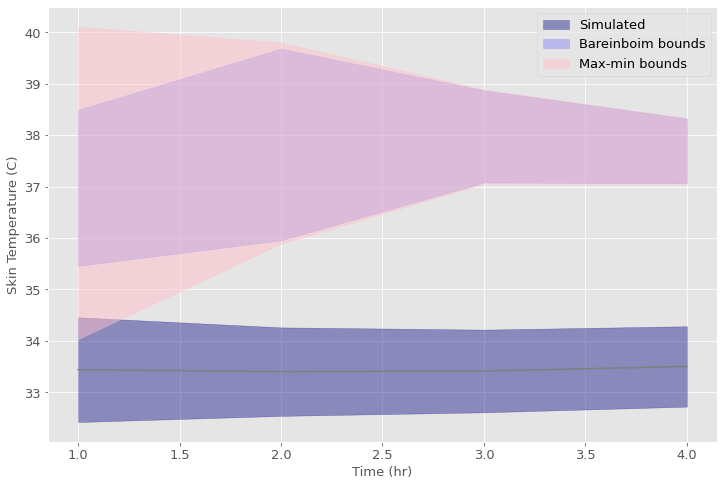

([0.5, 0.047619047619047616, 0.02097902097902098, 0.013986013986013986], 2)

In [119]:
plot_bounds('Temp_C', [8, 0, 0, 0],[1, 1, 1, 1])

In [76]:
trajec_actions['actions_tuple'] = trajec_actions['actions'].apply(tuple)
trajec_actions['actions_']
trajec_actions['counts'] = 1

In [79]:
counts = trajec_actions[['actions_tuple', 'counts']].groupby('actions_tuple').count()

In [84]:
counts.sort_values('counts', ascending=False, inplace=True)

<BarContainer object of 858 artists>

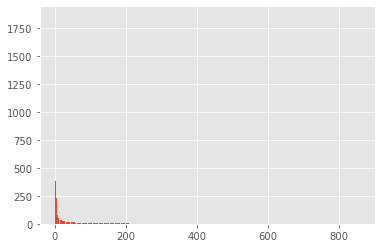

In [85]:
plt.bar(range(len(counts)), counts['counts'])

In [86]:
counts

,counts
actions_tuple,
"(1, 1, 1, 1)",1848
"(3, 3, 3, 3)",386
"(2, 2, 2, 2)",343
"(4, 4, 4, 4)",320
"(5, 5, 5, 5)",226
...,...
"(5, 4, 3, 2)",1
"(5, 4, 2, 2)",1
"(5, 4, 1, 4)",1


In [94]:
1848+386+343+320+226

3123

In [105]:
trajec_actions.to_csv("/data/localhost/taufiq/export-dir/mimic-trajectories.csv")
pulse_trajec_actions.to_csv("/data/localhost/taufiq/export-dir/pulse-trajectories.csv")